# Global Undernourishment Analysis and Visualization: 2001-2020

## Project Summary:

In this project, I conducted a comprehensive analysis and created visualizations to explore the prevalence of undernourishment and food insecurity across various regions from 2001 to 2020 using the dataset provided by the Food and Agriculture Organization of the United Nations.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.io import show
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Data Preparation:

## Data Loading and Cleaning: 
Imported the dataset from an Excel file, handled missing values, and ensured the 'Year' column was in integer format.
Selection of Entities: Focused on specific countries, including Afghanistan, India, Brazil, Bangladesh, Nigeria, and others, to provide a detailed analysis.

In [43]:
# Load the dataset from Excel
data = pd.read_excel('Zero_Hunger.xlsx')

In [45]:
data.head()

,Entity,Code,Year,Prevalence of undernourishment (% of population)
0,Afghanistan,AFG,2001,47.8
1,Afghanistan,AFG,2002,45.6
2,Afghanistan,AFG,2003,40.6
3,Afghanistan,AFG,2004,38.0
4,Afghanistan,AFG,2005,36.1


In [47]:
data.isnull().sum()

Entity                                                0
Code                                                260
Year                                                  0
Prevalence of undernourishment (% of population)      0
dtype: int64

In [49]:
data.dropna(inplace=True)

In [51]:
# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

In [53]:
data.describe()

,Year,Prevalence of undernourishment (% of population)
count,3240.000000,3240.000000
mean,2010.500000,10.954907
std,5.767171,11.397338
min,2001.000000,2.500000
25%,2005.750000,2.500000
50%,2010.500000,6.300000
75%,2015.250000,15.100000
max,2020.000000,70.900000


In [55]:
data.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence of undernourishment (% of population)'],
      dtype='object')

In [57]:
# Display the basic information about the DataFrame
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3240 entries, 0 to 3499
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            3240 non-null   object 
 1   Code                                              3240 non-null   object 
 2   Year                                              3240 non-null   int64  
 3   Prevalence of undernourishment (% of population)  3240 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 126.6+ KB
None


In [100]:
# Define selected entities
selected_entities = ['Afghanistan', 'India', 'Brazil', 'Bangladesh', 'Nigeria', 'Pakistan', 'Liberia', 'Argentina', 'Lebanon', 'Senegal', 'Somalia', 'Honduras', 'Vietnam']
data_selected = data[data['Entity'].isin(selected_entities)]

Interactive Line Chart: Created a time-series line chart showing the trend of undernourishment rates for selected countries, providing insights into how the situation evolved over time.

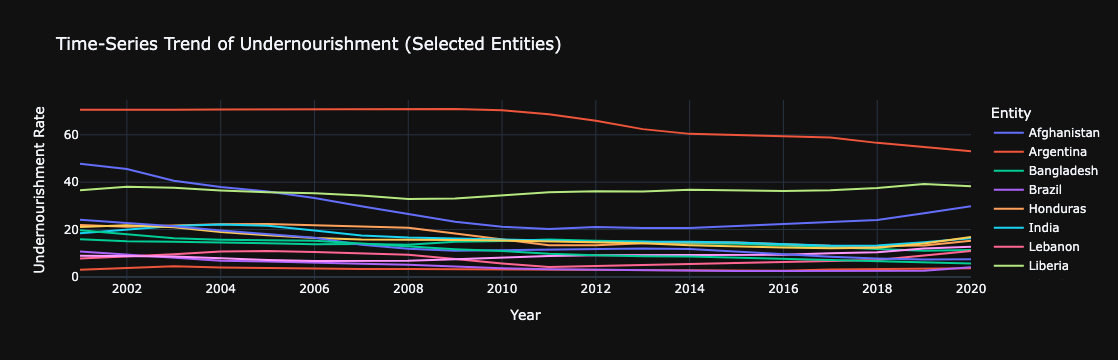

In [102]:
# Create an interactive line chart for selected entities
fig_selected = px.line(data_selected, x='Year', y='Prevalence of undernourishment (% of population)',
                       color='Entity', 
                       title='Time-Series Trend of Undernourishment (Selected Entities)',
                       labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate'},
                       template='plotly_dark')

# Add interactivity to the chart
fig_selected.update_layout(hovermode='x')

# Show the interactive chart for selected entities
fig_selected.show()

Animated Choropleth Map: Developed an animated map to visualize the spatial distribution of undernourishment rates across different countries over the years, highlighting changes and trends in a dynamic manner.

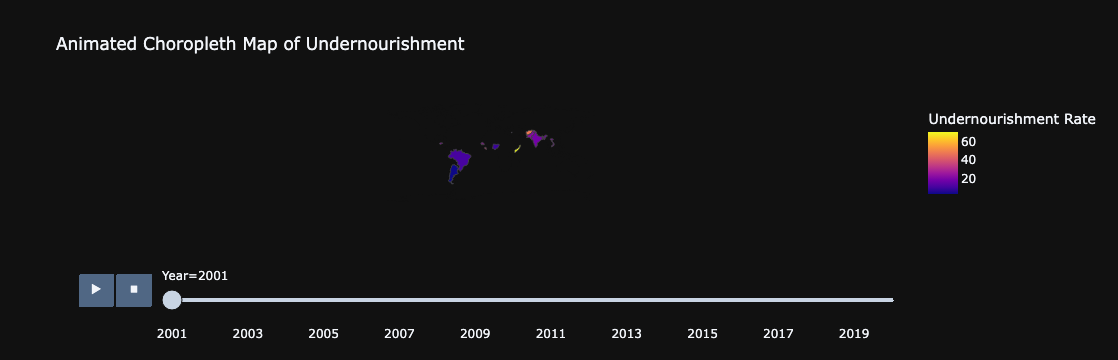

In [104]:
# Create an animated choropleth map
fig_map = px.choropleth(data_selected,
                        locations='Code',
                        color='Prevalence of undernourishment (% of population)',
                        hover_name='Entity',
                        animation_frame='Year',
                        title='Animated Choropleth Map of Undernourishment',
                        labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate'})

# Customize the map layout
fig_map.update_layout(geo=dict(showframe=False, showcoastlines=False),
                     template='plotly_dark')

# Show the animated map
fig_map.show()

Sunburst Chart: Produced a sunburst chart to display the distribution of undernourishment rates among different entities and years, offering a hierarchical view of the data.

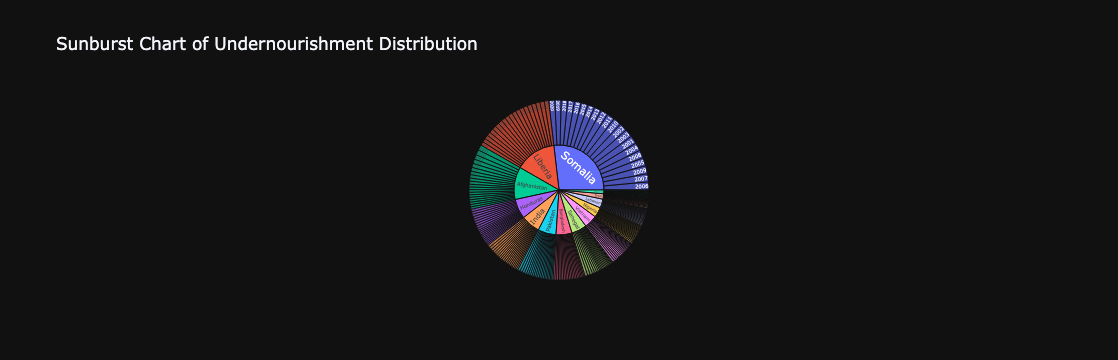

In [106]:
# Create a sunburst chart
fig_sunburst = px.sunburst(data_selected,
                           path=['Entity', 'Year'],
                           values='Prevalence of undernourishment (% of population)',
                           title='Sunburst Chart of Undernourishment Distribution',
                           labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate'})

# Customize the sunburst chart layout
fig_sunburst.update_layout(template='plotly_dark')

# Show the sunburst chart
fig_sunburst.show()

Bubble Map: Generated a bubble map to illustrate the severity of undernourishment with varying bubble sizes representing the prevalence rates, showing geographic variations.

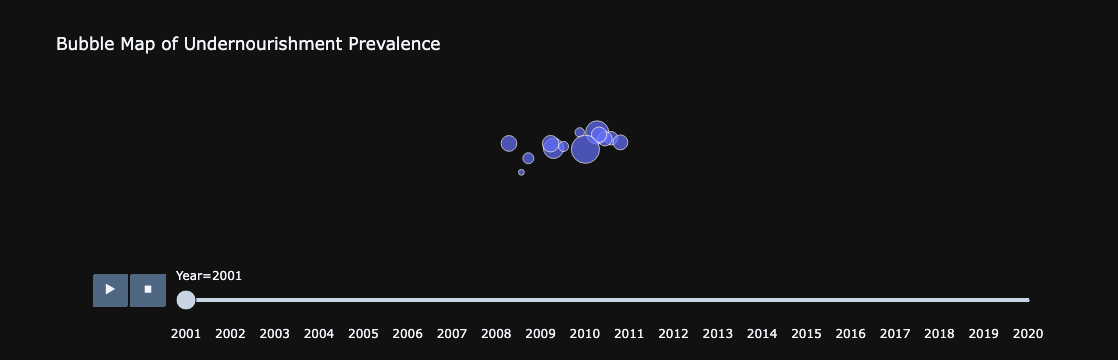

In [108]:
# Create a bubble map
fig_bubble_map = px.scatter_geo(data_selected,
                                locations='Code',
                                size='Prevalence of undernourishment (% of population)',
                                hover_name='Entity',
                                animation_frame='Year',
                                title='Bubble Map of Undernourishment Prevalence',
                                labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate'})

# Customize the bubble map layout
fig_bubble_map.update_geos(showframe=False, showcoastlines=False)
fig_bubble_map.update_layout(template='plotly_dark')

# Show the bubble map
fig_bubble_map.show()

Radar Chart: Created a radar chart to compare undernourishment rates across selected countries over different years, helping in the visual comparison of trends.

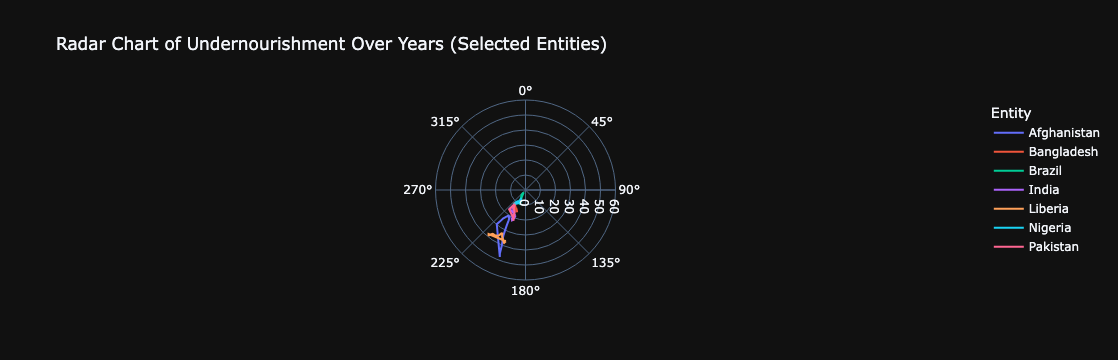

In [110]:
# Filter data for selected entities
selected_entities = ['Afghanistan', 'India', 'Brazil', 'Bangladesh', 'Nigeria', 'Pakistan', 'Liberia']
data_selected = data[data['Entity'].isin(selected_entities)]

# Create a radar chart
fig_radar = px.line_polar(data_selected, r='Prevalence of undernourishment (% of population)', theta='Year',
                          line_close=True, color='Entity',
                          title='Radar Chart of Undernourishment Over Years (Selected Entities)')

# Customize the radar chart layout
fig_radar.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 60])),
                        template='plotly_dark')

# Show the radar chart
fig_radar.show()

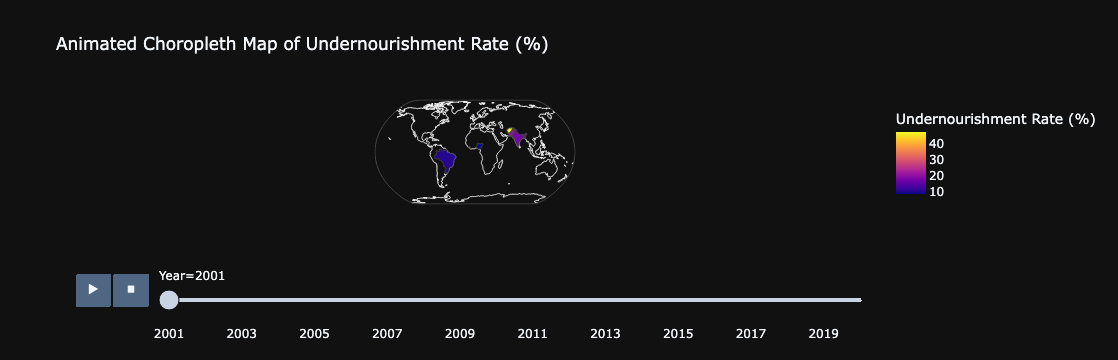

In [112]:
# Create an animated choropleth map
fig_choropleth = px.choropleth(data_selected,
                                locations='Code',
                                color='Prevalence of undernourishment (% of population)',
                                hover_name='Entity',
                                animation_frame='Year',
                                title='Animated Choropleth Map of Undernourishment Rate (%)',
                                labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate (%)'})

# Customize the map layout
fig_choropleth.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="white")
fig_choropleth.update_coloraxes(colorbar_title='Undernourishment Rate (%)')
fig_choropleth.update_layout(template='plotly_dark')

# Show the animated choropleth map
fig_choropleth.show()

Bar Chart: Designed a bar chart for the year 2020 to present a snapshot of undernourishment rates by country, making it easier to compare countries at a single point in time.

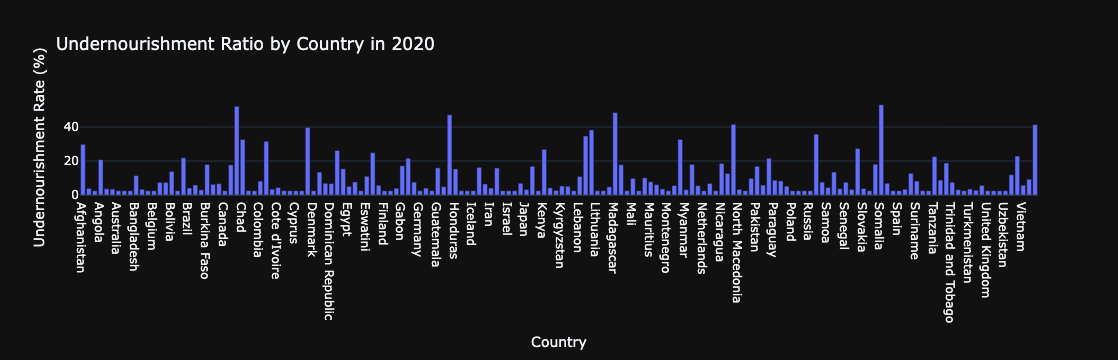

In [130]:
# Choose a specific year for the bar chart
selected_year = 2020
data_selected_year = data[data['Year'] == selected_year]

# Create a bar chart for the selected year
fig_bar_chart = px.bar(data_selected_year, x='Entity', y='Prevalence of undernourishment (% of population)',
                       title=f'Undernourishment Ratio by Country in {selected_year}',
                       labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate (%)'})

# Customize the bar chart layout
fig_bar_chart.update_layout(xaxis_title='Country', yaxis_title='Undernourishment Rate (%)', template='plotly_dark')

# Show the bar chart
fig_bar_chart.show()

Advanced Choropleth Map: Developed an advanced choropleth map with enhanced features such as custom color scales and hover templates, providing an in-depth view of undernourishment rates with additional information.

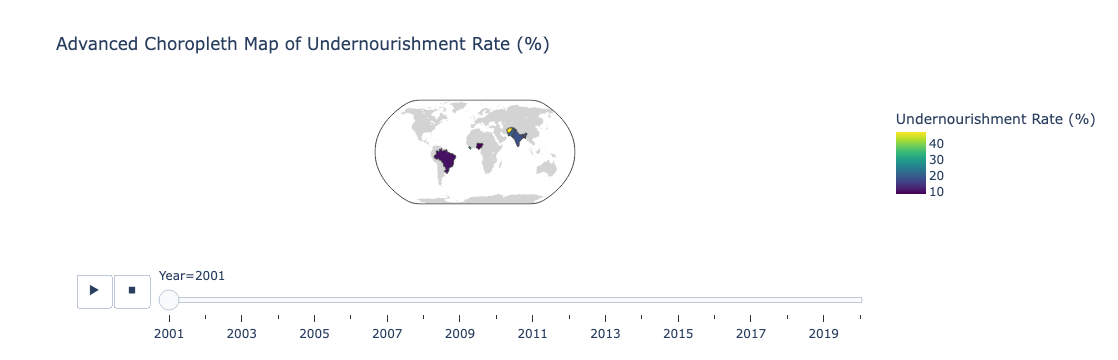

In [118]:
# Create an advanced choropleth map
fig_advanced_choropleth = px.choropleth(data_selected,
                                        locations='Code',
                                        color='Prevalence of undernourishment (% of population)',
                                        hover_name='Entity',
                                        animation_frame='Year',
                                        title='Advanced Choropleth Map of Undernourishment Rate (%)',
                                        labels={'Prevalence of undernourishment (% of population)': 'Undernourishment Rate (%)'},
                                        color_continuous_scale='Viridis',
                                        projection='natural earth')

# Add a hover template to show additional information
fig_advanced_choropleth.update_traces(hovertemplate='%{hovertext}Undernourishment Rate: %{z:.2f}%')

# Customize the map layout
fig_advanced_choropleth.update_geos(coastlinecolor="white", showland=True, landcolor="lightgray")
fig_advanced_choropleth.update_coloraxes(colorbar_title='Undernourishment Rate (%)')

# Show the advanced choropleth map
fig_advanced_choropleth.show()

This project aims to offer valuable insights into global undernourishment issues, highlighting regions of concern and tracking progress over time, while employing interactive and advanced visualization techniques to facilitate a deeper understanding of the data.